In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in embeddings
embedding_df = pd.read_csv('output/dms/embeddings/jones_esm1b_t33_650M_UR50S.csv')
embedding_df = embedding_df.iloc[:, 1:]

In [5]:
# PCA
pca = PCA(n_components=10)
pca_embeddings = pca.fit_transform(embedding_df)

# convert to dataframe
pca_df = pd.DataFrame(pca_embeddings, columns=[f'PC{i+1}' for i in range(pca_embeddings.shape[1])])

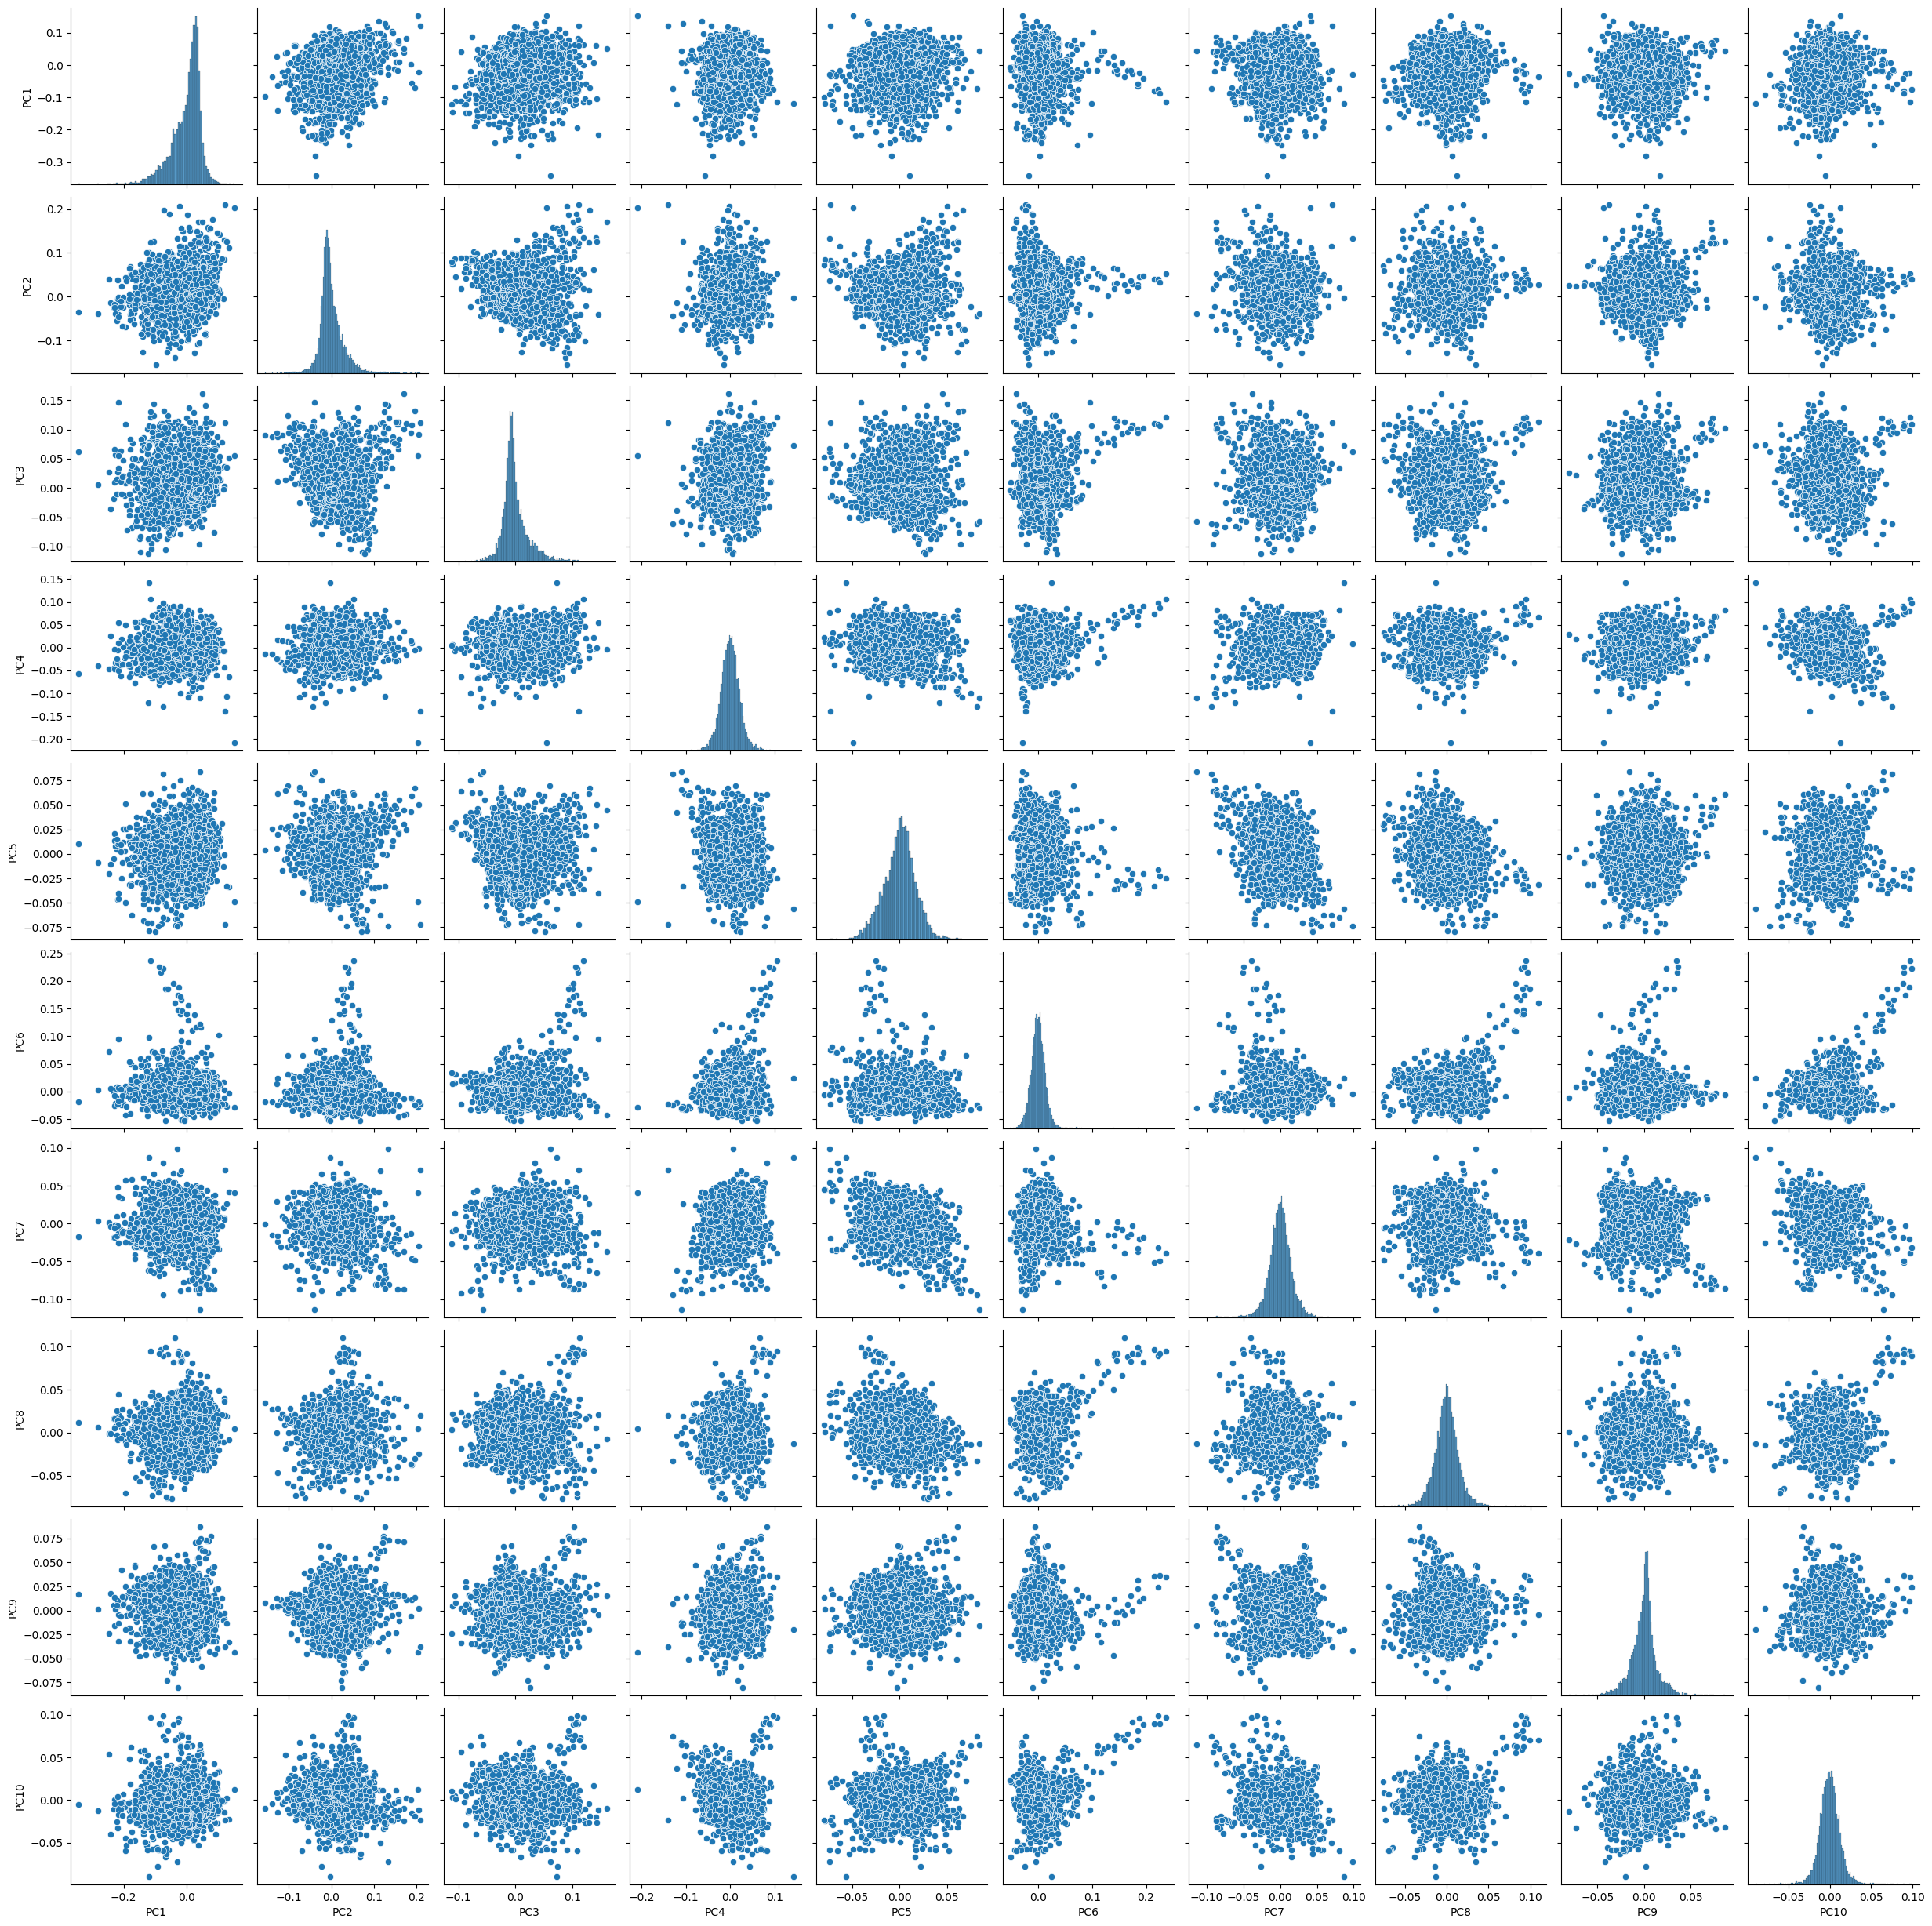

In [9]:
sns.pairplot(pca_df)

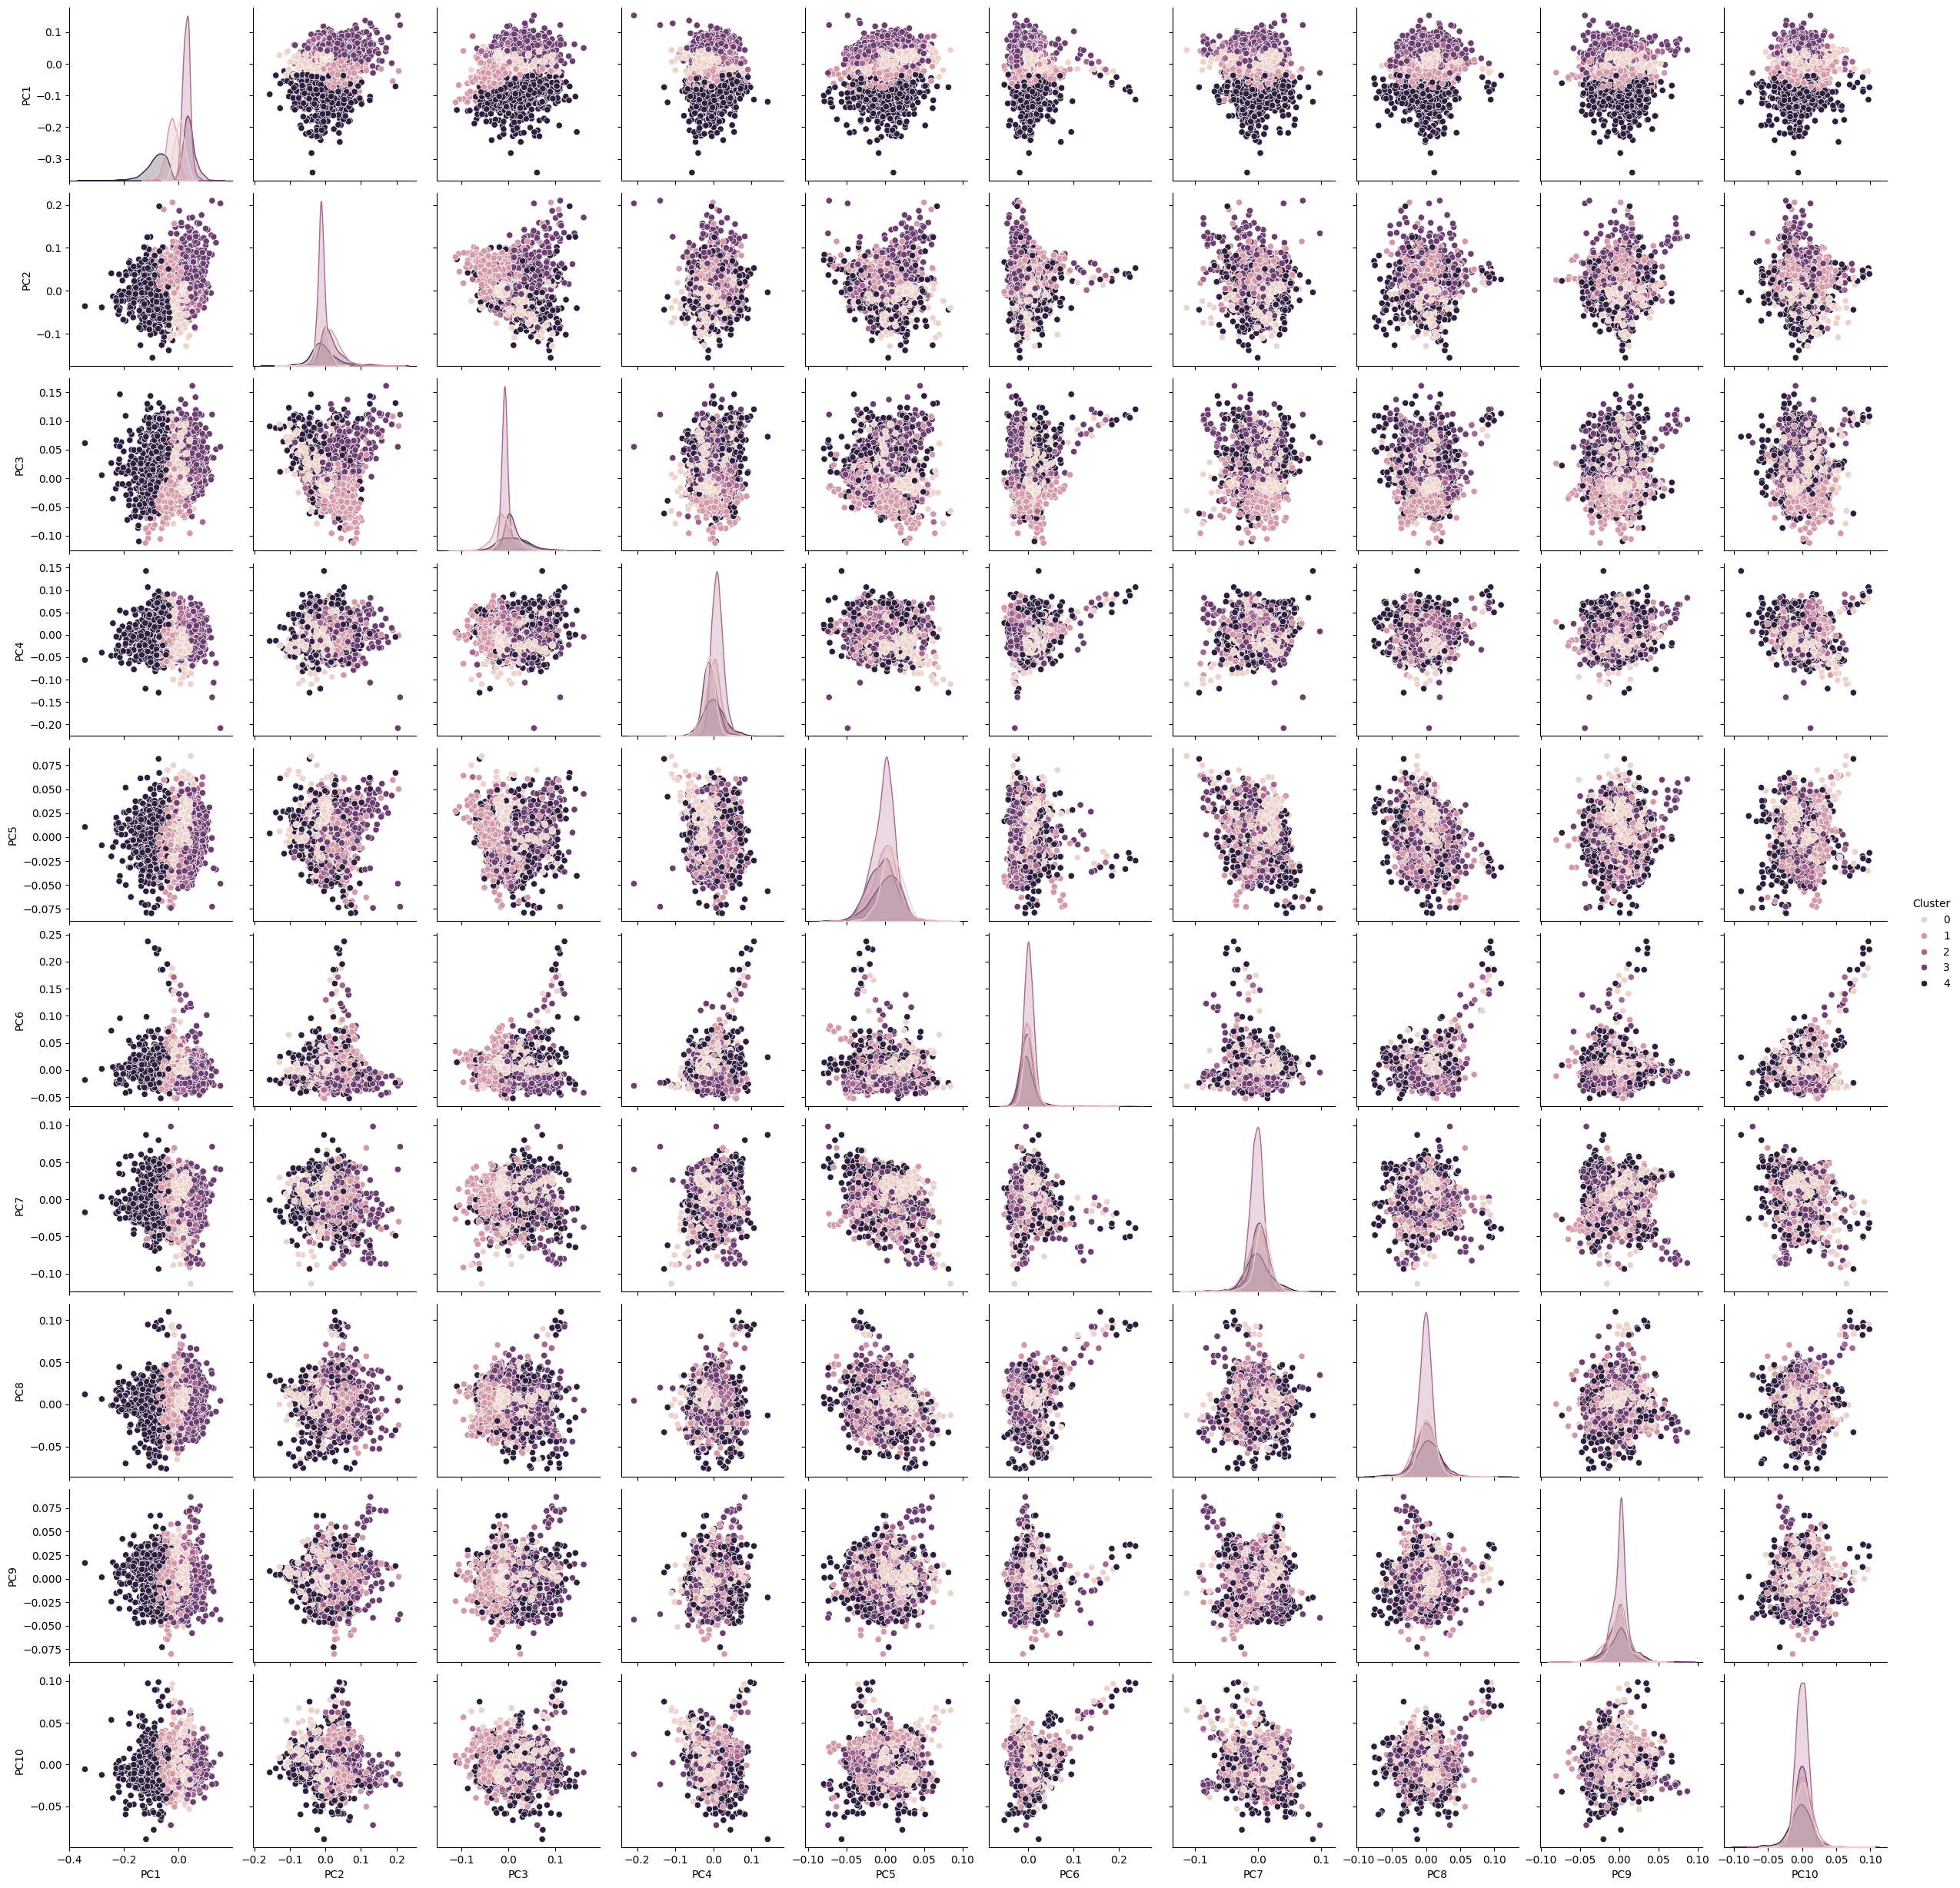

In [13]:
# perform K-medoids cluster on PCA embeddings
clusters = KMedoids(n_clusters = 5, metric='euclidean', random_state=42).fit(pca_embeddings)
pca_df['Cluster'] = clusters.labels_
sns.pairplot(pca_df, hue="Cluster")